In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#load dataset
data = pd.read_csv("cancer_expression.csv")
data.head(5)

,Gene,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,...,Treatment6,Treatment7,Treatment8,Treatment9,Treatment10,Treatment11,Treatment12,Treatment13,Treatment14,Treatment15
0,Gene1,56,97,19,76,65,25,87,91,79,...,63,46,96,64,84,19,66,66,51,66
1,Gene2,8,93,64,18,13,94,57,6,88,...,48,38,78,66,18,99,52,19,76,82
2,Gene3,64,45,33,19,49,69,93,75,13,...,27,66,92,41,48,90,95,39,69,51
3,Gene4,94,46,81,55,67,56,8,98,27,...,66,79,96,93,66,5,31,66,81,7
4,Gene5,63,36,92,56,66,62,56,16,43,...,79,60,21,42,28,73,74,90,15,20


In [45]:
control_cols = [i for i in data.columns if "Control" in i]
treatment_cols = [i for i in data.columns if "Treatment" in i]

#gene_rows = [row for row in data.rows if "Gene" in row]
#print(gene_rows)

print("\n")

print("Colums of Controls: ")
print(control_cols)

print("\n")

print("Colums of Treatment: ")
print(treatment_cols)



Colums of Controls: 
['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Control9', 'Control10', 'Control11', 'Control12', 'Control13', 'Control14', 'Control15']


Colums of Treatment: 
['Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'Treatment5', 'Treatment6', 'Treatment7', 'Treatment8', 'Treatment9', 'Treatment10', 'Treatment11', 'Treatment12', 'Treatment13', 'Treatment14', 'Treatment15']


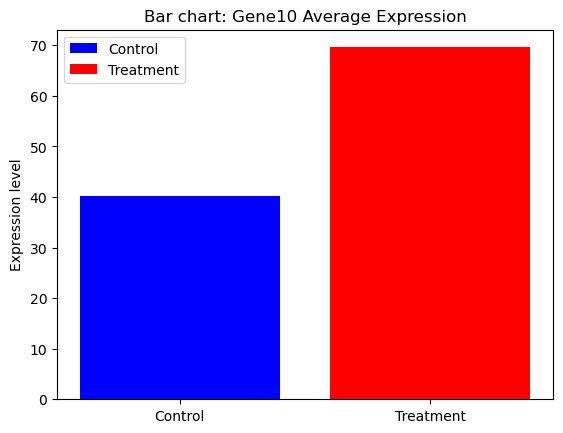

In [24]:
#plt.bar(x,y,color)


#select the gene row
gene = "Gene10"
gene_data = data[data["Gene"] == gene]

#compute average
control_mean = gene_data[control_cols].mean(axis = 1).values[0]
treatment_mean = gene_data[treatment_cols].mean(axis = 1).values[0]

plt.bar("Control", control_mean,color='blue', label = "Control")
plt.bar("Treatment", treatment_mean,color='red', label = "Treatment")
plt.title(f"Bar chart: {gene} Average Expression")
plt.ylabel("Expression level")
plt.legend()
plt.show()

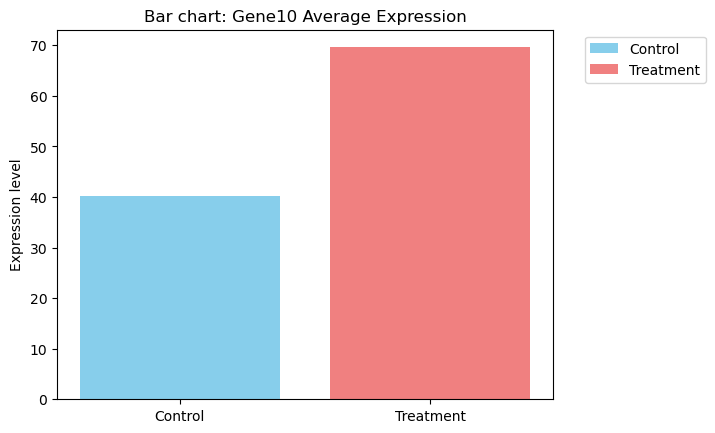

In [27]:
bars = plt.bar(["Control","Treatment"],
              [control_mean, treatment_mean],
              color = ["skyblue", "lightcoral"])

plt.title(f"Bar chart: {gene} Average Expression")
plt.ylabel("Expression level")

plt.legend(bars, ["Control", "Treatment"],
          bbox_to_anchor = (1.05, 1),
          loc = 'upper left')

plt.show()

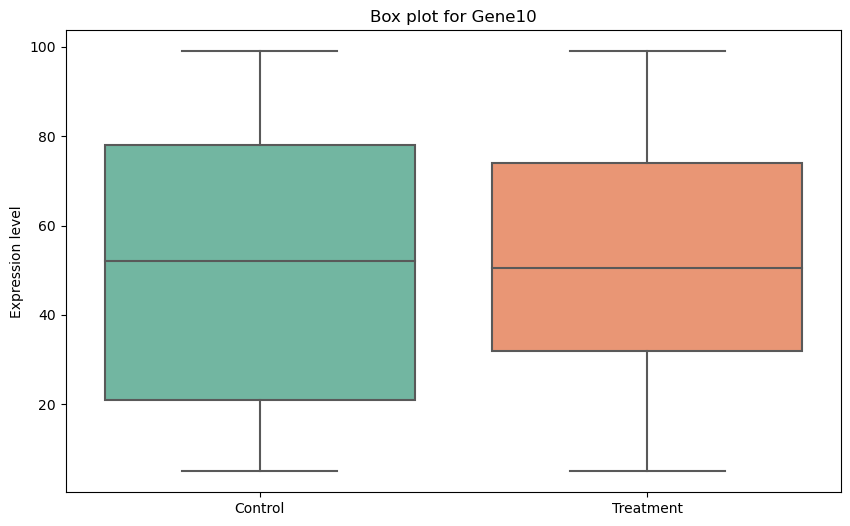

In [30]:
control_data =  data[['Control1', 'Control2']].values.flatten()
treatment_data = data[['Treatment1', 'Treatment2']].values.flatten()

plt.figure(figsize=(10,6))
sns.boxplot(data = [control_data, treatment_data], palette = "Set2")

plt.xticks([0,1],['Control','Treatment'])
plt.title(f"Box plot for {gene}")
plt.ylabel("Expression level")

plt.show()

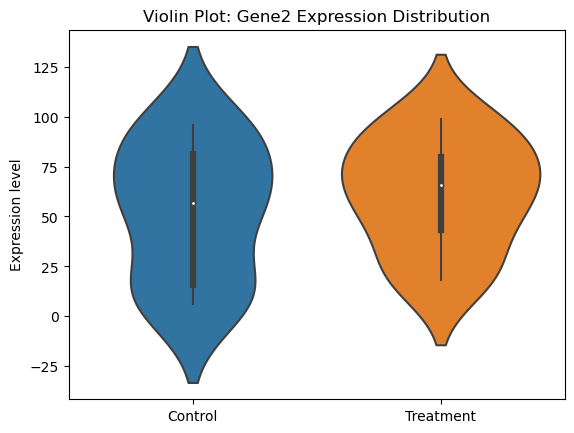

In [46]:
gene = "Gene2"

gene_row = (data[data["Gene"] == gene].iloc[0])

data = [gene_row[control_cols].values, gene_row[treatment_cols].values]

sns.violinplot(data = data)
plt.xticks([0,1], ["Control","Treatment"])

plt.ylabel("Expression level")
plt.title(f"Violin Plot: {gene} Expression Distribution")
plt.show()

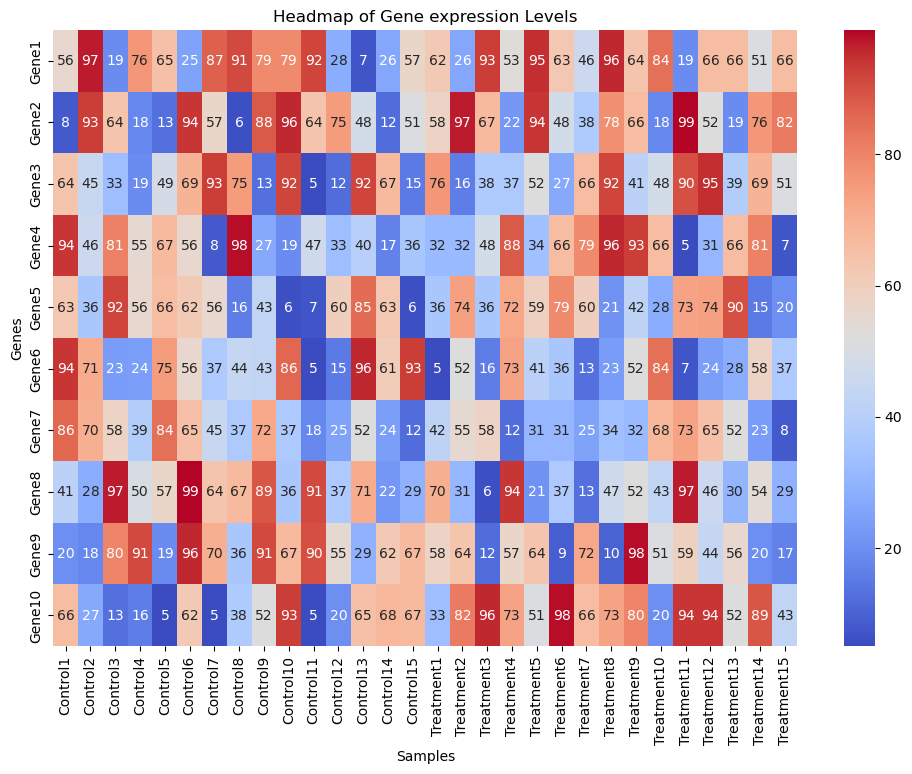

In [50]:
heatmap_data = data.set_index('Gene')
heatmap =  heatmap_data.head(10)

plt.figure(figsize = (12,8))
sns.heatmap(heatmap, cmap= "coolwarm", annot= True)
plt.title("Headmap of Gene expression Levels")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.show()